In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the CSV Files

In [10]:
df_customer_details = pd.read_csv('Customer_and_bank details_p1.csv')
df_social_economic = pd.read_csv('Customer_social_economic_data_p1.csv')
df_campaign_details = pd.read_csv('Customer_campaign_details_p1.csv')
df_response_data = pd.read_csv('Customer_Response_data_p1.csv')

In [12]:
df_merged = df_customer_details \
    .merge(df_social_economic, on='Customer_id') \
    .merge(df_campaign_details, on='Customer_id') \
    .merge(df_response_data, on='Customer_id')

# 2. Data exploration

In [16]:
df_merged.head()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,nr.employed,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,1,56,services,married,high.school,no,no,yes,3,S1,...,5191.0,telephone,may,mon,307,1,999,0,nonexistent,no
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,...,5191.0,telephone,may,mon,198,1,999,0,nonexistent,no
2,3,59,admin.,married,professional.course,no,no,no,4,S2,...,5191.0,telephone,may,mon,139,1,999,0,nonexistent,no
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,...,5191.0,telephone,may,mon,217,1,999,0,nonexistent,no
4,5,24,technician,single,professional.course,no,yes,no,3,S3,...,5191.0,telephone,may,mon,380,1,999,0,nonexistent,no


In [18]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37084 entries, 0 to 37083
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     37084 non-null  int64  
 1   age             37084 non-null  int64  
 2   job             37084 non-null  object 
 3   marital         37084 non-null  object 
 4   education       37084 non-null  object 
 5   default         37084 non-null  object 
 6   housing         37084 non-null  object 
 7   loan            37084 non-null  object 
 8   Region_Code     37084 non-null  object 
 9   State_Code      37084 non-null  object 
 10  City_Code       37084 non-null  object 
 11  emp.var.rate    37084 non-null  float64
 12  cons.price.idx  37084 non-null  float64
 13  cons.conf.idx   37084 non-null  float64
 14  euribor3m       37084 non-null  float64
 15  nr.employed     37084 non-null  float64
 16  contact         37084 non-null  object 
 17  month           37084 non-null 

In [20]:
df_merged.describe()

,Customer_id,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,duration,campaign,pdays,previous
count,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000
mean,18542.500000,40.042714,0.082669,93.576076,-40.505183,3.621668,5167.058664,258.237946,2.569545,962.530849,0.172986
std,10705.373028,10.432965,1.568997,0.578493,4.622045,1.733972,72.196605,258.730909,2.770611,186.773063,0.495681
min,1.000000,17.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,1.000000,0.000000,0.000000
25%,9271.750000,32.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,102.000000,1.000000,999.000000,0.000000
50%,18542.500000,38.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,180.000000,2.000000,999.000000,0.000000
75%,27813.250000,47.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,319.250000,3.000000,999.000000,0.000000
max,37084.000000,98.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,4918.000000,56.000000,999.000000,7.000000


In [22]:
print(f"Shape of the merged DataFrame: {df_merged.shape}")

Shape of the merged DataFrame: (37084, 25)


# 3. Data cleaning

In [26]:
missing_values = df_merged.isnull().sum()
missing_values

Customer_id       0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
Region_Code       0
State_Code        0
City_Code         0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64

In [28]:
df_merged_cleaned = df_merged.dropna(subset=['y'])

In [30]:
Q1 = df_merged_cleaned['age'].quantile(0.25)
Q3 = df_merged_cleaned['age'].quantile(0.75)
IQR = Q3 - Q1
df_merged_cleaned = df_merged_cleaned[~((df_merged_cleaned['age'] < (Q1 - 1.5 * IQR)) | (df_merged_cleaned['age'] > (Q3 + 1.5 * IQR)))]

In [32]:
df_merged_cleaned

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,nr.employed,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,1,56,services,married,high.school,no,no,yes,3,S1,...,5191.0,telephone,may,mon,307,1,999,0,nonexistent,no
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,...,5191.0,telephone,may,mon,198,1,999,0,nonexistent,no
2,3,59,admin.,married,professional.course,no,no,no,4,S2,...,5191.0,telephone,may,mon,139,1,999,0,nonexistent,no
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,...,5191.0,telephone,may,mon,217,1,999,0,nonexistent,no
4,5,24,technician,single,professional.course,no,yes,no,3,S3,...,5191.0,telephone,may,mon,380,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37077,37078,64,retired,divorced,professional.course,no,yes,no,2,S16,...,4963.6,cellular,nov,fri,151,3,999,0,nonexistent,no
37078,37079,37,admin.,married,university.degree,no,yes,no,2,S16,...,4963.6,cellular,nov,fri,281,1,999,0,nonexistent,yes
37080,37081,46,blue-collar,married,professional.course,no,no,no,2,S16,...,4963.6,cellular,nov,fri,383,1,999,0,nonexistent,no
37081,37082,56,retired,married,university.degree,no,yes,no,2,S16,...,4963.6,cellular,nov,fri,189,2,999,0,nonexistent,no


# 4. Data transformation

In [36]:
from sklearn.preprocessing import StandardScaler

In [38]:
df_merged_transformed = pd.get_dummies(df_merged_cleaned, drop_first=True)

In [40]:
df_merged_transformed

,Customer_id,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,duration,campaign,pdays,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,1,56,1.1,93.994,-36.4,4.857,5191.0,307,1,999,...,False,False,False,True,False,False,False,True,False,False
1,2,45,1.1,93.994,-36.4,4.857,5191.0,198,1,999,...,False,False,False,True,False,False,False,True,False,False
2,3,59,1.1,93.994,-36.4,4.857,5191.0,139,1,999,...,False,False,False,True,False,False,False,True,False,False
3,4,41,1.1,93.994,-36.4,4.857,5191.0,217,1,999,...,False,False,False,True,False,False,False,True,False,False
4,5,24,1.1,93.994,-36.4,4.857,5191.0,380,1,999,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37077,37078,64,-1.1,94.767,-50.8,1.028,4963.6,151,3,999,...,True,False,False,False,False,False,False,True,False,False
37078,37079,37,-1.1,94.767,-50.8,1.028,4963.6,281,1,999,...,True,False,False,False,False,False,False,True,False,True
37080,37081,46,-1.1,94.767,-50.8,1.028,4963.6,383,1,999,...,True,False,False,False,False,False,False,True,False,False
37081,37082,56,-1.1,94.767,-50.8,1.028,4963.6,189,2,999,...,True,False,False,False,False,False,False,True,False,False


In [42]:
df_merged_transformed.head()

,Customer_id,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,duration,campaign,pdays,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,1,56,1.1,93.994,-36.4,4.857,5191.0,307,1,999,...,False,False,False,True,False,False,False,True,False,False
1,2,45,1.1,93.994,-36.4,4.857,5191.0,198,1,999,...,False,False,False,True,False,False,False,True,False,False
2,3,59,1.1,93.994,-36.4,4.857,5191.0,139,1,999,...,False,False,False,True,False,False,False,True,False,False
3,4,41,1.1,93.994,-36.4,4.857,5191.0,217,1,999,...,False,False,False,True,False,False,False,True,False,False
4,5,24,1.1,93.994,-36.4,4.857,5191.0,380,1,999,...,False,False,False,True,False,False,False,True,False,False


In [44]:
scaler = StandardScaler()
numerical_features = ['age', 'campaign', 'previous', 'duration']
df_merged_transformed[numerical_features] = scaler.fit_transform(df_merged_transformed[numerical_features])

In [46]:
df_merged_transformed[numerical_features]

,age,campaign,previous,duration
0,1.694419,-0.567233,-0.344826,0.189128
1,0.557201,-0.567233,-0.344826,-0.231712
2,2.004569,-0.567233,-0.344826,-0.459506
3,0.143668,-0.567233,-0.344826,-0.158355
4,-1.613850,-0.567233,-0.344826,0.470975
...,...,...,...,...
37077,2.521486,0.152149,-0.344826,-0.413175
37078,-0.269866,-0.567233,-0.344826,0.088744
37080,0.660585,-0.567233,-0.344826,0.482558
37081,1.694419,-0.207542,-0.344826,-0.266460


# 5. Data visualization

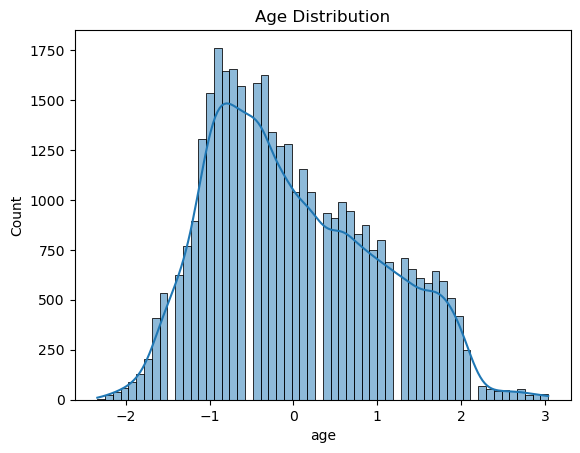

In [49]:
# Histogram for age distribution
sns.histplot(df_merged_transformed['age'], kde=True)
plt.title('Age Distribution')
plt.show()

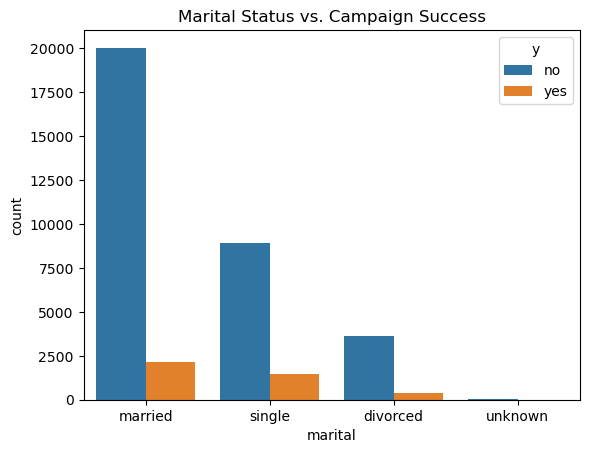

In [51]:
# Bar plot for marital status vs. campaign success
sns.countplot(x='marital', hue='y', data=df_merged_cleaned)
plt.title('Marital Status vs. Campaign Success')
plt.show()

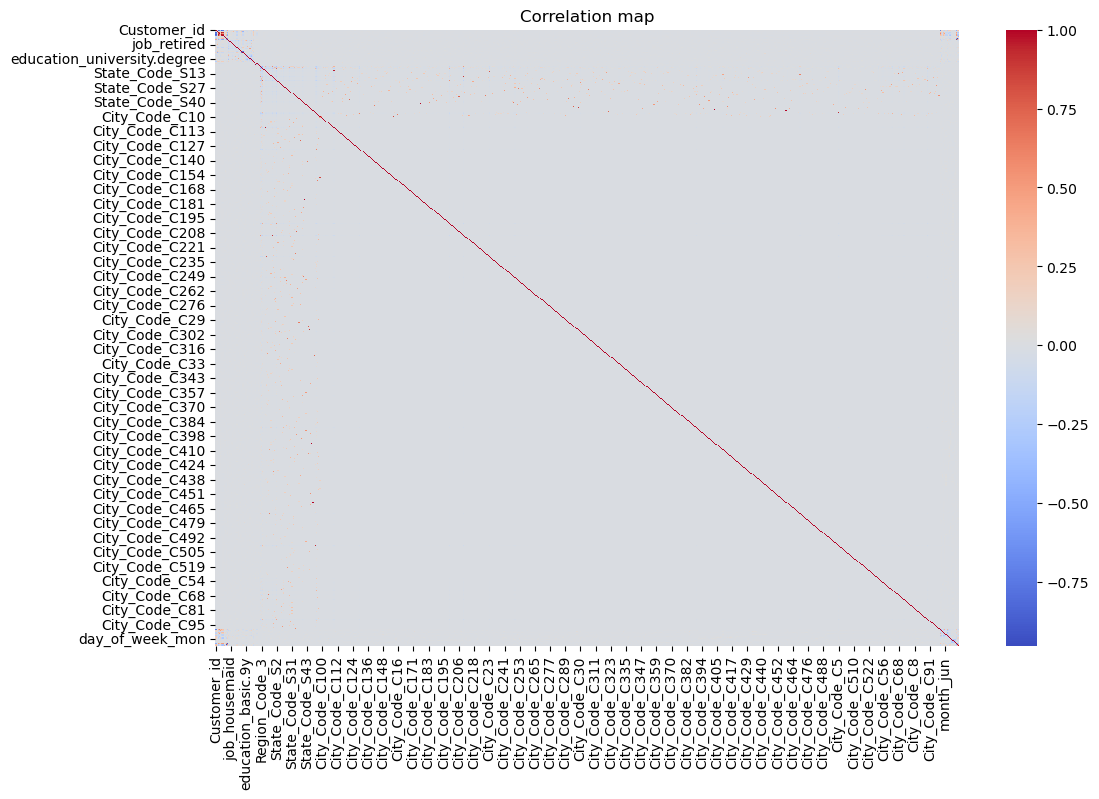

In [61]:
# Correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df_merged_transformed.corr(), cmap='coolwarm')
plt.title('Correlation map')
plt.show()

# 6. Exploratory Data Analysis (EDA)

In [77]:
# Correlation between features and target variable
correlation_with_target = df_merged_transformed.corr()['y_yes'].sort_values(ascending=False)
correlation_with_target

y_yes                   1.000000
duration                0.413888
poutcome_success        0.310973
Customer_id             0.284013
previous                0.222992
                          ...   
poutcome_nonexistent   -0.187477
emp.var.rate           -0.290671
euribor3m              -0.299157
pdays                  -0.318934
nr.employed            -0.345165
Name: y_yes, Length: 637, dtype: float64

In [79]:
# Frequency analysis for categorical variables like 'education'
education_distribution = df_merged_cleaned['education'].value_counts()
education_distribution

education
university.degree      10908
high.school             8514
basic.9y                5396
professional.course     4709
basic.4y                3544
basic.6y                2063
unknown                 1506
illiterate                15
Name: count, dtype: int64

In [90]:
df_merged_cleaned['y_numeric'] = df_merged_cleaned['y'].map({'yes': 1, 'no': 0})

In [98]:
profession_success_rate = df_merged_cleaned.groupby('job')['y_numeric'].mean().sort_values(ascending=False)
profession_success_rate

job
student          0.312907
retired          0.185505
unemployed       0.144865
admin.           0.131959
management       0.109464
technician       0.107629
unknown          0.102990
self-employed    0.102745
housemaid        0.087852
entrepreneur     0.084798
services         0.084015
blue-collar      0.069177
Name: y_numeric, dtype: float64

### (a) Correlation Analysis

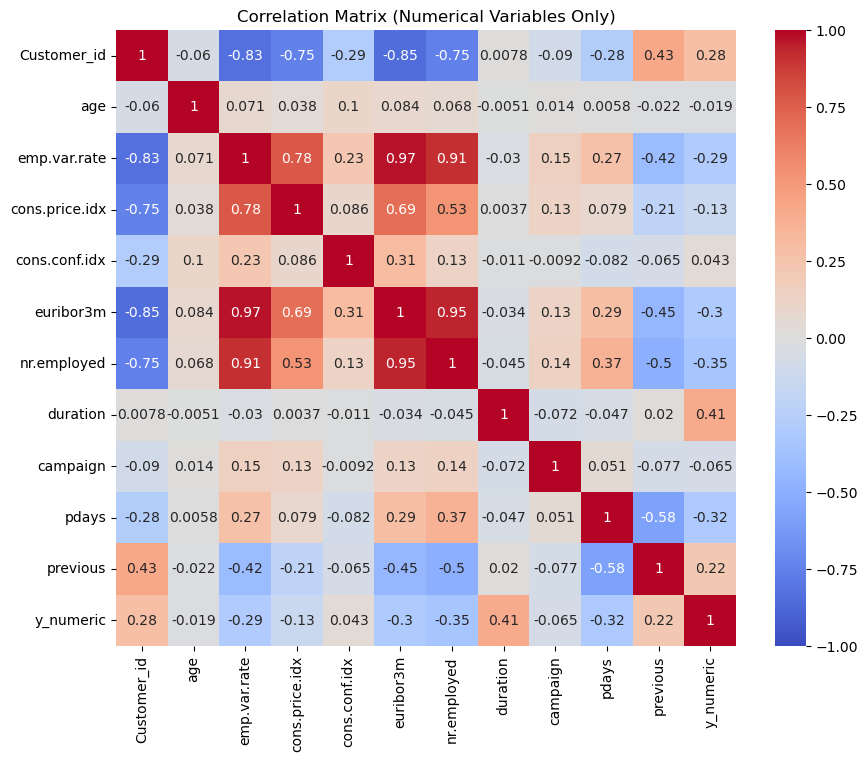

In [108]:
# Select only numerical columns
numerical_df = df_merged_cleaned.select_dtypes(include='number')
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Numerical Variables Only)')
plt.show()


### (b) Frequency Analysis

In [111]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan']

for column in categorical_columns:
    print(f'Frequency distribution for {column}:')
    print(df_merged_cleaned[column].value_counts())
    print('\n')

Frequency distribution for job:
job
admin.           9412
blue-collar      8312
technician       6095
services         3547
management       2631
entrepreneur     1309
self-employed    1275
retired          1159
unemployed        925
housemaid         922
student           767
unknown           301
Name: count, dtype: int64


Frequency distribution for marital:
marital
married     22192
single      10392
divorced     3999
unknown        72
Name: count, dtype: int64


Frequency distribution for education:
education
university.degree      10908
high.school             8514
basic.9y                5396
professional.course     4709
basic.4y                3544
basic.6y                2063
unknown                 1506
illiterate                15
Name: count, dtype: int64


Frequency distribution for default:
default
no         28994
unknown     7659
yes            2
Name: count, dtype: int64


Frequency distribution for housing:
housing
yes        19194
no         16588
unknown      873
Na

### (c) Segmentation Analysis

In [116]:
marital_status_success_rate = df_merged_cleaned.groupby('marital')['y_numeric'].mean().sort_values(ascending=False)
marital_status_success_rate

marital
unknown     0.166667
single      0.141551
married     0.096927
divorced    0.092023
Name: y_numeric, dtype: float64

In [118]:
education_success_rate = df_merged_cleaned.groupby('education')['y_numeric'].mean().sort_values(ascending=False)
print(education_success_rate)

education
university.degree      0.136047
unknown                0.133466
professional.course    0.110852
high.school            0.109819
basic.6y               0.080465
basic.4y               0.079007
basic.9y               0.076538
illiterate             0.066667
Name: y_numeric, dtype: float64


### (d) Distribution Analysis

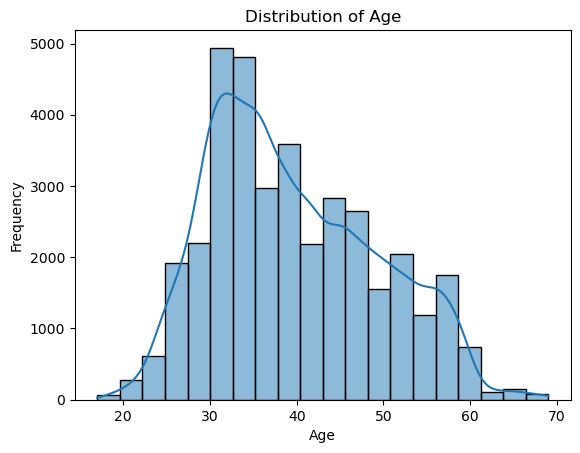

In [121]:
# Distribution of age
sns.histplot(df_merged_cleaned['age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

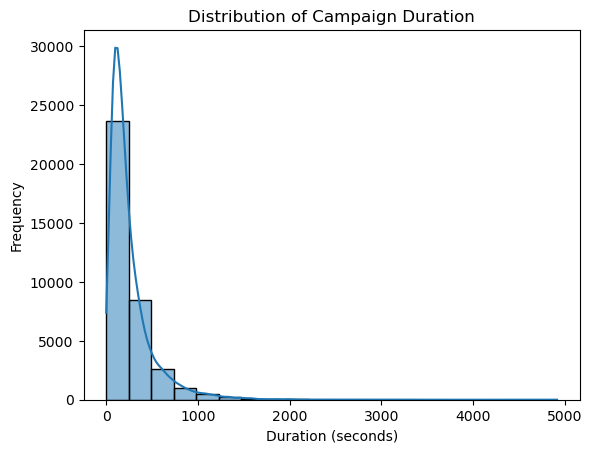

In [123]:
# Distribution of campaign duration
sns.histplot(df_merged_cleaned['duration'], kde=True, bins=20)
plt.title('Distribution of Campaign Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

### (e) Pair Plots for Relationship Analysis

D:\Anaconda-py\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


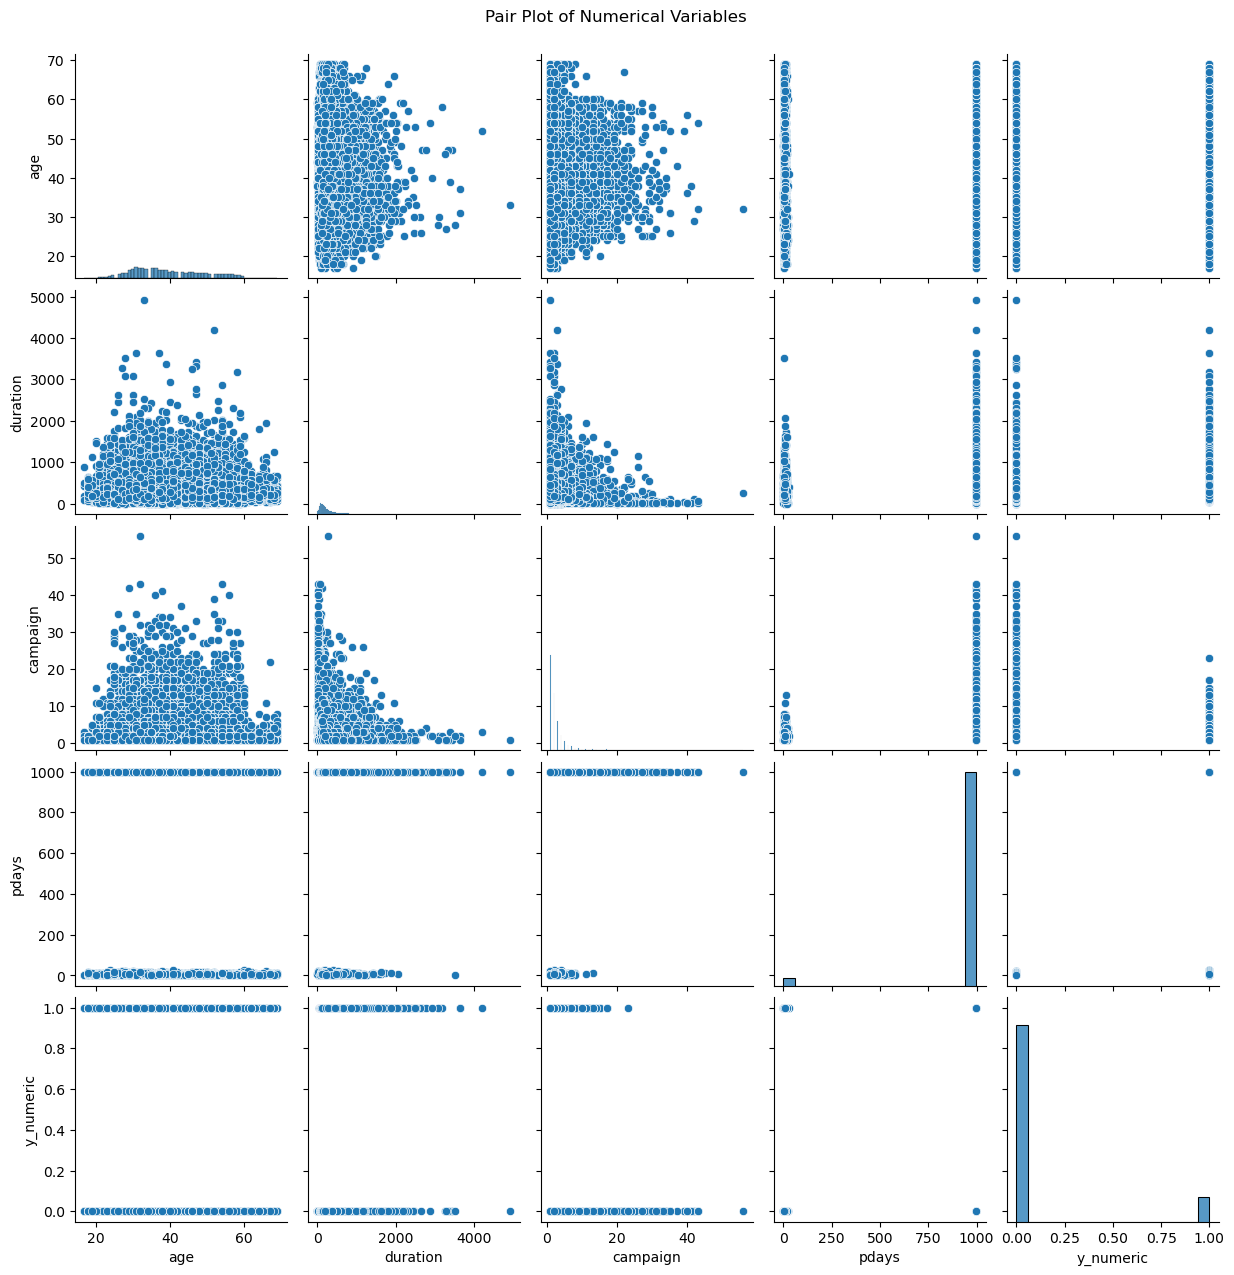

In [129]:
sns.pairplot(df_merged_cleaned[['age', 'duration', 'campaign', 'pdays', 'y_numeric']])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

# 7. Data summary

In [138]:
print("Summary of Data Manipulation and Visualization:")
print(f"Total number of records: {df_merged.shape[0]}")
print(f"Number of features after transformation: {df_merged_transformed.shape[1]}")
print(f"Key correlations with the target variable:\n{correlation_with_target.head(5)}")
print(f"Marital Status Distribution:\n{df_merged_cleaned['marital'].value_counts()}")
print(f"Profession-based success rates:\n{profession_success_rate}")


Summary of Data Manipulation and Visualization:
Total number of records: 37084
Number of features after transformation: 637
Key correlations with the target variable:
y_yes               1.000000
duration            0.413888
poutcome_success    0.310973
Customer_id         0.284013
previous            0.222992
Name: y_yes, dtype: float64
Marital Status Distribution:
marital
married     22192
single      10392
divorced     3999
unknown        72
Name: count, dtype: int64
Profession-based success rates:
job
student          0.312907
retired          0.185505
unemployed       0.144865
admin.           0.131959
management       0.109464
technician       0.107629
unknown          0.102990
self-employed    0.102745
housemaid        0.087852
entrepreneur     0.084798
services         0.084015
blue-collar      0.069177
Name: y_numeric, dtype: float64
